In [70]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [ ]:
df  = pd.read_csv('/content/sample_data/Master_project_ab_testing.csv')

In [2]:
df  = pd.read_csv('Master_project_ab_testing.csv')

In [34]:
df

,id,country,gender,group,join_dt,device,dt,device.1,spent
0,1010340,USA,F,B,2023-01-30,A,NaN,NaN,0.0
1,1020252,BRA,M,A,2023-01-27,A,NaN,NaN,0.0
2,1017309,BRA,M,A,2023-01-28,A,NaN,NaN,0.0
3,1002379,BRA,F,A,2023-02-03,A,NaN,NaN,0.0
4,1004713,TUR,NaN,B,2023-01-31,A,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
49077,1048582,GBR,M,B,2023-01-28,I,NaN,NaN,0.0
49078,1028525,FRA,F,B,2023-01-28,A,NaN,NaN,0.0
49079,1029872,USA,M,B,2023-01-30,A,2023-01-30,A,23.0
49080,1034053,DEU,F,A,2023-01-29,A,NaN,NaN,0.0


In [116]:
df.iloc[:,[1,2,3,4,5,8]]

,country,gender,group,join_dt,device,spent
0,USA,F,B,2023-01-30,A,0.0
1,BRA,M,A,2023-01-27,A,0.0
2,BRA,M,A,2023-01-28,A,0.0
3,BRA,F,A,2023-02-03,A,0.0
4,TUR,NaN,B,2023-01-31,A,0.0
...,...,...,...,...,...,...
49077,GBR,M,B,2023-01-28,I,0.0
49078,FRA,F,B,2023-01-28,A,0.0
49079,USA,M,B,2023-01-30,A,23.0
49080,DEU,F,A,2023-01-29,A,0.0


In [117]:
df.loc[:,['id','group','spent']]

,id,group,spent
0,1010340,B,0.0
1,1020252,A,0.0
2,1017309,A,0.0
3,1002379,A,0.0
4,1004713,B,0.0
...,...,...,...
49077,1048582,B,0.0
49078,1028525,B,0.0
49079,1029872,B,23.0
49080,1034053,A,0.0


In [53]:
aa = df[['id','spent','group']].groupby(['id','group'])['spent'].sum()

In [54]:
aa

id       group
1000000  B        0.0
1000001  A        0.0
1000002  A        0.0
1000003  B        0.0
1000004  A        0.0
                 ... 
1049995  B        0.0
1049996  A        0.0
1049997  B        0.0
1049998  B        0.0
1049999  B        0.0
Name: spent, Length: 48943, dtype: float64

In [59]:
df_aggregated = df.groupby(['id','group'])['spent'].sum()


In [130]:
df_aggregated.describe()


count    48943.000000
mean         3.382736
std         25.674946
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1659.400000
Name: spent, dtype: float64

In [131]:
a = df.groupby('group')['id'].nunique()

In [132]:
a


group
A    24343
B    24600
Name: id, dtype: int64

In [133]:
mean1 = a.mean()

In [134]:
mean1

24471.5

In [135]:
sum1 = df['spent'].sum()

In [136]:
sum1

165561.22993358204

In [137]:

max1 = df['spent'].max()
min1 = df['spent'].min()
count1 = df['spent'].count()
median1 = df['spent'].median() 
std1 = df['spent'].std() 
var1 = df['spent'].var()  

In [138]:
stats_spent = df_aggregated.groupby('group').agg(['mean', 'std', 'count', 'sum','min','max'])

In [140]:
stats_spent

,mean,std,count,sum,min,max
group,,,,,,
A,3.374518,25.936391,24343,82145.903065,0.0,1659.4
B,3.390867,25.414110,24600,83415.326869,0.0,1546.3


In [141]:
count_a = stats_spent['count'][0]
count_b = stats_spent['count'][1]

In [142]:
mean_a = stats_spent['mean'][0]
mean_b = stats_spent['mean'][1]

In [143]:
std_a = stats_spent['std'][0]
std_b = stats_spent['std'][1]

In [144]:
z_critical = stats.norm.ppf(q = 0.975)

In [145]:
z_critical

1.959963984540054

In [151]:
SE_Mean_a = std_a/np.sqrt(count_a)
SE_Mean_b = std_b/np.sqrt(count_b)

In [146]:
margin_of_error_a = z_critical * std_a/np.sqrt(count_a)
margin_of_error_b = z_critical * std_b/np.sqrt(count_b)

In [147]:
confidence_interval_a = (mean_a - margin_of_error_a,mean_a + margin_of_error_a)

In [148]:
confidence_interval_a

(3.0487038399601043, 3.700333095897578)

In [149]:
confidence_interval_b = (mean_b - margin_of_error_b,mean_b + margin_of_error_b)

In [150]:
confidence_interval_b

(3.073285270142202, 3.7084486216293646)

In [158]:
##What is the 95% confidence interval for the difference in the average amount spent per user between the treatment and the control (treatment-control)?
Use the t distribution and assume unequal variance.//

SyntaxError: invalid syntax (2074729455.py, line 1)

In [152]:
difference_of_mean = mean_a - mean_b

In [153]:
SE_mean_difference = np.sqrt((std_a*std_a/count_a) +(std_b*std_b/count_b))

In [156]:
confidence_interval_difference = (difference_of_mean - z_critical*SE_mean_difference,difference_of_mean + z_critical*SE_mean_difference)

In [157]:
confidence_interval_difference

(-0.4713356124635211, 0.4386386565496366)

25.43958203959349


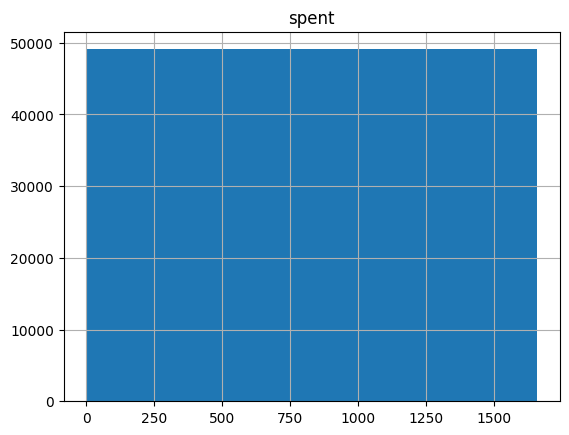

In [100]:
pd.DataFrame(df['spent']).hist(bins = 1)

print( stats.skew(df['spent']) );